In [51]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [31]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [32]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [33]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [35]:
coordinates

[]

In [17]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

641

In [37]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [38]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1ab242982ed4c56ff0c9d9bab575545b


In [40]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | hermanus
Processing Record 2 of Set 13 | punta arenas
Processing Record 3 of Set 13 | yellowknife
Processing Record 4 of Set 13 | nikolskoye
Processing Record 5 of Set 13 | egvekinot
Processing Record 6 of Set 13 | pisco
Processing Record 7 of Set 13 | sibolga
Processing Record 8 of Set 13 | mapiripan
Processing Record 9 of Set 13 | port alfred
Processing Record 10 of Set 13 | mataura
Processing Record 11 of Set 13 | lebu
Processing Record 12 of Set 13 | grand river south east
City not found. Skipping...
Processing Record 13 of Set 13 | kremenchuk
Processing Record 14 of Set 13 | busselton
Processing Record 15 of Set 13 | kapaa
Processing Record 16 of Set 13 | illapel
Processing Record 17 of Set 13 | jamestown
Processing Record 18 of Set 13 | ponta delgada
Processing Record 19 of Set 13 | port hawkesbury
Processing Record 20 of Set 13 | arraial do cabo
Processing Record 21 of Set 13 | rikitea
Pr

Processing Record 33 of Set 16 | high rock
Processing Record 34 of Set 16 | sangar
Processing Record 35 of Set 16 | provideniya
Processing Record 36 of Set 16 | bosaso
Processing Record 37 of Set 16 | tasiilaq
Processing Record 38 of Set 16 | mitsamiouli
Processing Record 39 of Set 16 | henties bay
Processing Record 40 of Set 16 | joue-les-tours
Processing Record 41 of Set 16 | viedma
Processing Record 42 of Set 16 | mrirt
City not found. Skipping...
Processing Record 43 of Set 16 | kosonsoy
Processing Record 44 of Set 16 | mumbwa
Processing Record 45 of Set 16 | cape town
Processing Record 46 of Set 16 | klaksvik
Processing Record 47 of Set 16 | whitehorse
Processing Record 48 of Set 16 | ambilobe
Processing Record 49 of Set 16 | tura
Processing Record 50 of Set 16 | sao teotonio
Processing Record 1 of Set 17 | yuci
Processing Record 2 of Set 17 | angoram
Processing Record 3 of Set 17 | port elizabeth
Processing Record 4 of Set 17 | pacific grove
Processing Record 5 of Set 17 | mar de

Processing Record 19 of Set 20 | samarai
Processing Record 20 of Set 20 | baicheng
Processing Record 21 of Set 20 | yamada
Processing Record 22 of Set 20 | severo-yeniseyskiy
Processing Record 23 of Set 20 | dafeng
Processing Record 24 of Set 20 | gorontalo
Processing Record 25 of Set 20 | mezen
Processing Record 26 of Set 20 | burgeo
Processing Record 27 of Set 20 | miri
Processing Record 28 of Set 20 | riyadh
Processing Record 29 of Set 20 | rosarito
Processing Record 30 of Set 20 | nizhnevartovsk
Processing Record 31 of Set 20 | nosy varika
Processing Record 32 of Set 20 | komyshuvakha
Processing Record 33 of Set 20 | yuzhnyy
Processing Record 34 of Set 20 | byron bay
Processing Record 35 of Set 20 | saryshagan
City not found. Skipping...
Processing Record 36 of Set 20 | port hardy
Processing Record 37 of Set 20 | alofi
Processing Record 38 of Set 20 | tecoanapa
Processing Record 39 of Set 20 | russell
Processing Record 40 of Set 20 | san patricio
Processing Record 41 of Set 20 | ca

Processing Record 9 of Set 24 | polunochnoye
Processing Record 10 of Set 24 | caravelas
Processing Record 11 of Set 24 | kununurra
Processing Record 12 of Set 24 | ottumwa
Processing Record 13 of Set 24 | herouville-saint-clair
Processing Record 14 of Set 24 | codrington
Processing Record 15 of Set 24 | lindsay
Processing Record 16 of Set 24 | san juan
Processing Record 17 of Set 24 | oromocto
Processing Record 18 of Set 24 | bulgan
Processing Record 19 of Set 24 | houma
Processing Record 20 of Set 24 | estelle
Processing Record 21 of Set 24 | tyukalinsk
Processing Record 22 of Set 24 | marsa matruh
Processing Record 23 of Set 24 | utiroa
City not found. Skipping...
Processing Record 24 of Set 24 | antofagasta
Processing Record 25 of Set 24 | dolbeau
City not found. Skipping...
Processing Record 26 of Set 24 | baza
Processing Record 27 of Set 24 | buta
Processing Record 28 of Set 24 | ilulissat
Processing Record 29 of Set 24 | hondo
Processing Record 30 of Set 24 | belen
Processing Rec

In [41]:
len(city_data)

578

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,46.00,79,53,7.36,ZA,2020-07-12 03:28:47
1,Punta Arenas,-53.15,-70.92,28.40,86,0,8.05,CL,2020-07-12 03:28:47
2,Yellowknife,62.46,-114.35,70.00,64,75,8.05,CA,2020-07-12 03:28:47
3,Nikolskoye,59.70,30.79,60.01,87,20,8.95,RU,2020-07-12 03:28:48
4,Egvekinot,66.32,-179.17,61.68,40,0,4.36,RU,2020-07-12 03:28:48
5,Pisco,-13.70,-76.22,57.20,82,20,3.36,PE,2020-07-12 03:28:48
6,Sibolga,1.74,98.78,79.54,84,100,3.04,ID,2020-07-12 03:28:48
7,Mapiripan,2.89,-72.13,73.27,94,100,3.56,CO,2020-07-12 03:28:48
8,Port Alfred,-33.59,26.89,48.99,69,15,7.00,ZA,2020-07-12 03:28:48
9,Mataura,-46.19,168.86,43.86,90,100,8.46,NZ,2020-07-12 03:28:48


In [9]:
# Arrange columns:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2020-07-12 03:28:47,-34.42,19.23,46.00,79,53,7.36
1,Punta Arenas,CL,2020-07-12 03:28:47,-53.15,-70.92,28.40,86,0,8.05
2,Yellowknife,CA,2020-07-12 03:28:47,62.46,-114.35,70.00,64,75,8.05
3,Nikolskoye,RU,2020-07-12 03:28:48,59.70,30.79,60.01,87,20,8.95
4,Egvekinot,RU,2020-07-12 03:28:48,66.32,-179.17,61.68,40,0,4.36
5,Pisco,PE,2020-07-12 03:28:48,-13.70,-76.22,57.20,82,20,3.36
6,Sibolga,ID,2020-07-12 03:28:48,1.74,98.78,79.54,84,100,3.04
7,Mapiripan,CO,2020-07-12 03:28:48,2.89,-72.13,73.27,94,100,3.56
8,Port Alfred,ZA,2020-07-12 03:28:48,-33.59,26.89,48.99,69,15,7.00
9,Mataura,NZ,2020-07-12 03:28:48,-46.19,168.86,43.86,90,100,8.46


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [42]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [43]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/11/20'

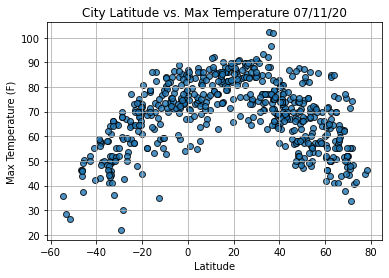

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

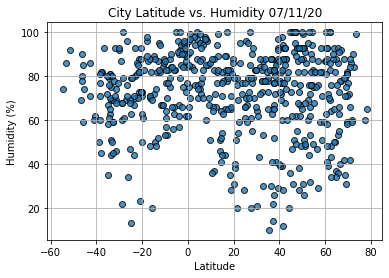

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

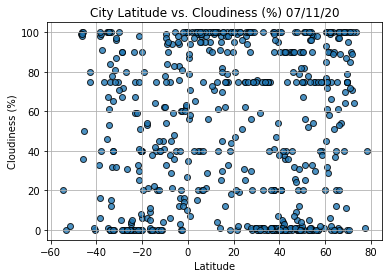

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

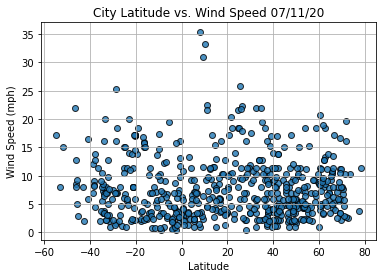

In [44]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [45]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [46]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

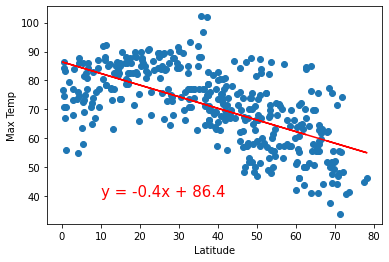

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(10,40))

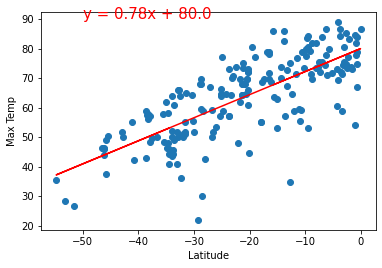

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))

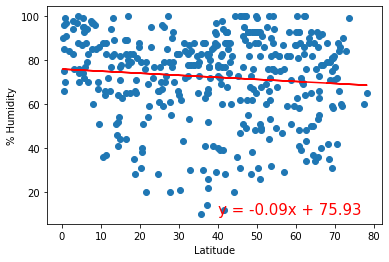

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(40,10))

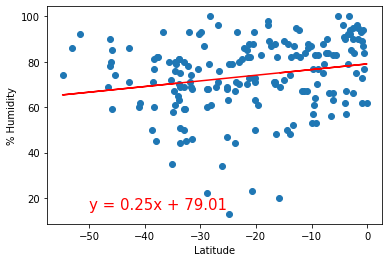

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-50,15))

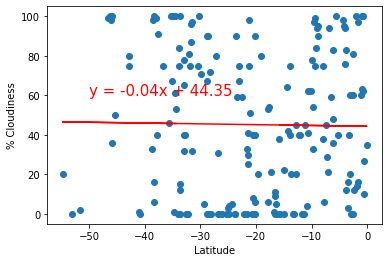

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,60))

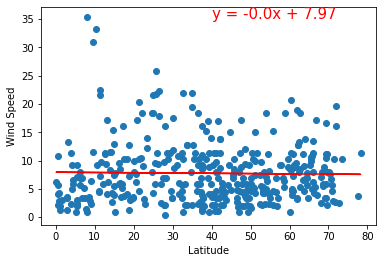

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(40,35))

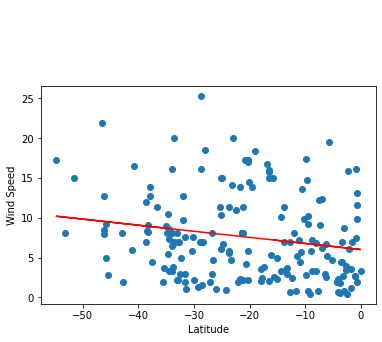

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-50,35))